Epoch 0 Loss: 0.28630
Epoch 1000 Loss: 0.25008
Epoch 2000 Loss: 0.24998
Epoch 3000 Loss: 0.24991
Epoch 4000 Loss: 0.24983
Epoch 5000 Loss: 0.24972
Epoch 6000 Loss: 0.24955
Epoch 7000 Loss: 0.24922
Epoch 8000 Loss: 0.24855
Epoch 9000 Loss: 0.24690

Final XOR predictions (rounded):
[[1.]
 [0.]
 [1.]
 [0.]]
Expected:
[[0]
 [1]
 [1]
 [0]]


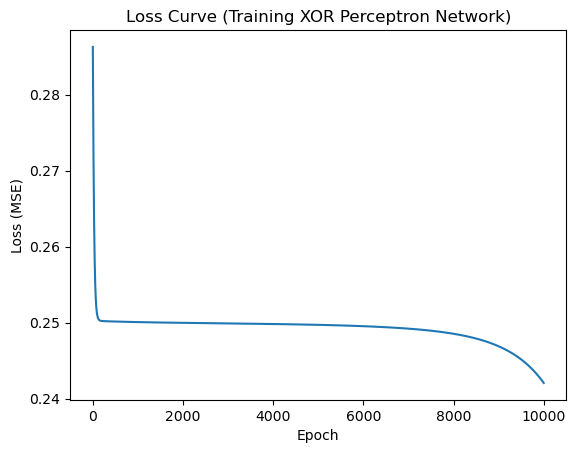

In [14]:
'''Perform a Multilayer perceptron neural network to classify flower type. Utilize number of hidden layers, 5 and 200 to 400 iterations with a learning rate. Try with different loss functions/ activation functions such as MSE, Cross entropy, sigmoid, tanh, ReLU along with different optimizers GD, SGD, Adam. Illustrate the result with performance metrics and observe Weight, Loss curve and accuracy curve.
Dataset: Iris dataset
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss
import matplotlib.pyplot as plt

# Load and prepare the dataset
iris = pd.read_csv('iris.csv')
print(iris.
X = iris.drop('species', axis=1).values
y = LabelEncoder().fit_transform(iris['species'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=0, stratify=y
)

# MLP with 5 hidden layers, ReLU activation, Adam optimizer
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5, 5, 5, 5),
    activation='relu',
    solver='adam',
    max_iter=400,
    learning_rate_init=0.01,
    random_state=0
)
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test)
loss = log_loss(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)

print('Classification Report:\n', classification_report(y_test, y_pred))
print(f'Final Loss: {loss:.4f}')
print(f'Final Accuracy: {acc:.4f}')

# Plot loss curve ONLY
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
